In [2]:
import pandas as pd
import seaborn as sns

In [3]:
hostels = pd.read_csv('../data/hostel.csv')
penguins = sns.load_dataset("penguins")

### Portfolio assignment 14
Perform a bivariate analysis on at least 1 combination of 2 columns with categorical data in the dataset that you chose in portfolio assignment 4.
- Do you expect their to be a correlation between the two columns?
- Create a contingency table. Do you observe different ratios between categories here?
- Create a bar plot for this contingency table. Do you observe different ratios between categories here?
- Do a chi-squared test. What does the result say? What's the chance of there being a correlation between the two columns?

![](https://i.imgur.com/0v1CGNV.png)

I think there might be a correlation between the city and its overall rating.

In [18]:
hostels.head(3)

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447


In [8]:
hostels.groupby('City').mean()

,Unnamed: 0,price.from,summary.score,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
City,,,,,,,,,,,,
Fukuoka-City,155.894737,2736.842105,9.070588,8.817647,9.376471,8.900000,9.017647,9.076471,9.358824,8.982353,130.420316,33.586296
Hiroshima,150.714286,2578.571429,9.171429,8.535714,9.535714,8.785714,9.228571,9.371429,9.450000,9.242857,132.435495,34.385859
Kyoto,174.320513,2293.589744,8.961644,8.441096,9.345205,8.793151,8.884932,9.094521,9.168493,9.013699,135.761126,34.997727
Osaka,177.673077,12014.423077,8.626733,8.091089,8.754455,8.501980,8.560396,8.697030,9.064356,8.700000,135.198067,34.324737
Tokyo,169.338583,10647.244094,8.719672,8.125410,8.914754,8.495902,8.586066,9.000000,9.101639,8.808197,139.767171,35.698671


<AxesSubplot:xlabel='City', ylabel='summary.score'>

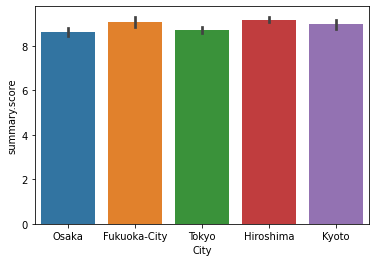

In [13]:
sns.barplot(x="City", y="summary.score", data=hostels, ci = 90)

<AxesSubplot:xlabel='City', ylabel='summary.score'>

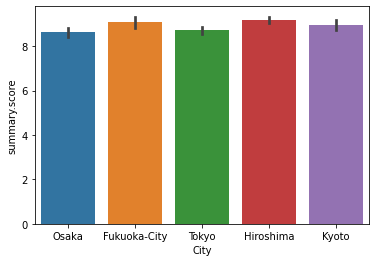

In [14]:
sns.barplot(x="City", y="summary.score", data=hostels, ci=95)

<AxesSubplot:xlabel='City', ylabel='summary.score'>

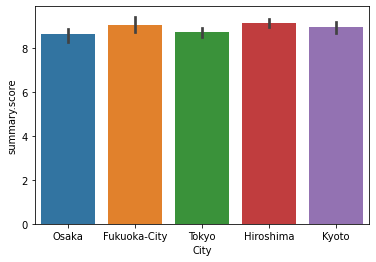

In [12]:
sns.barplot(x="City", y="summary.score", data=hostels, ci = 99)

### Contingency table

Ranking best to worst: Fabulous, Superb, Very Good, Good, Rating (Rating is supossed to be the worst one but the naming is very odd)

Looking at the table below, the hotels in the Kansai region (Kyoto, Osaka) seem to have similar ratios. At the same time the cities which aren't as well known for tourism (Fukuoka-City, Hiroshima) which have not as much ratings tends to be only on the very positive side (Fabulous and Superb). The capital of Japan Tokyo has a somewhat similar ratio like the cities in the Kansai region.

In [16]:
contingencyTable = hostels.groupby(['City','rating.band']).size().unstack('rating.band', fill_value=0)
contingencyTable

rating.band,Fabulous,Good,Rating,Superb,Very Good
City,,,,,
Fukuoka-City,8,0,0,9,0
Hiroshima,3,0,0,11,0
Kyoto,21,2,2,46,2
Osaka,35,7,3,50,6
Tokyo,39,2,3,66,12


When shown as a barplot the same stuff from the table above can be applied with the barplot image below.


<AxesSubplot:xlabel='City'>

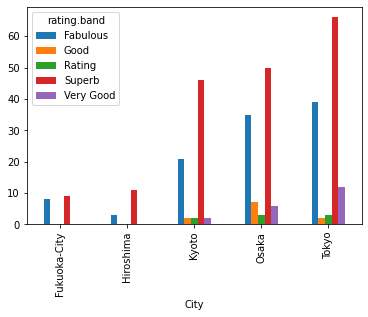

In [19]:
contingencyTable.plot(kind='bar')

There's not a high chance there's a correlation.

In [20]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(17.847526065753286,
 0.332900843166079,
 16,
 array([[ 5.51070336,  0.57186544,  0.41590214,  9.4617737 ,  1.03975535],
        [ 4.5382263 ,  0.47094801,  0.34250765,  7.79204893,  0.85626911],
        [23.66360856,  2.45565749,  1.78593272, 40.62996942,  4.4648318 ],
        [32.74006116,  3.39755352,  2.47094801, 56.21406728,  6.17737003],
        [39.54740061,  4.10397554,  2.98470948, 67.90214067,  7.4617737 ]]))

### DO THIS AGAIN FOR ANOTHER CATEGORICAL COLUMN